In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from rich import print
import numpy as np
import json
from langdetect import detect, LangDetectException, DetectorFactory
from typing import List
from arabert.preprocess import ArabertPreprocessor
import re
DetectorFactory.seed = 0
from pyarabic.araby import strip_diacritics, normalize_hamza
import matplotlib.pyplot as plt 

In [2]:
data_path = '../../data/raw/Full FCIT data no names.xlsx'

df = pd.read_excel(data_path)

df.head(10)

1-(ŸÖÿÆÿ∑ÿ∑ ÿßŸÑŸÖŸÇÿ±ÿ± Ÿàÿßÿ∂ÿ≠ ÿ®ÿßŸÑŸÜÿ≥ÿ®ÿ© ŸÑŸä ÿ®ŸÖÿß ŸÅŸä ÿ∞ŸÑŸÉ ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ ŸàÿßŸÑŸÖŸáÿßÿ±ÿßÿ™ ÿßŸÑÿ™Ÿä ÿµŸÖŸÖ ÿßŸÑŸÖŸÇÿ±ÿ± ŸÑÿ™ÿ∑ŸàŸäÿ±Ÿáÿß)- (The course outline (including the knowledge and skills the course was designed to develop) was made clear to me)  \
0                          Strongly Agree-ÿ£ŸàÿßŸÅŸÇ ÿ®ÿ¥ÿØÿ©                                                                                                                                                           
1                          Strongly Agree-ÿ£ŸàÿßŸÅŸÇ ÿ®ÿ¥ÿØÿ©                                                                                                                                                           
2                          Strongly Agree-ÿ£ŸàÿßŸÅŸÇ ÿ®ÿ¥ÿØÿ©                                                                                                                                                           
3                                        Agree-ÿ£ŸàÿßŸÅŸÇ                                                                                                                                                           
4                                        Agree-ÿ£ŸàÿßŸÅŸÇ                                                                                                                                                           
5                                        Agree-ÿ£ŸàÿßŸÅŸÇ                                                                                                                                                           
6                          Strongly Agree-ÿ£ŸàÿßŸÅŸÇ ÿ®ÿ¥ÿØÿ©                                                                                                                                                           
7                                  Disagree-ŸÑÿß ÿ£ŸàÿßŸÅŸÇ                                                                                                                                                           
8                          Strongly Agree-ÿ£ŸàÿßŸÅŸÇ ÿ®ÿ¥ÿØÿ©                                                                                                                                                           
9                          Strongly Agree-ÿ£ŸàÿßŸÅŸÇ ÿ®ÿ¥ÿØÿ©                                                                                                                                                           

  2-ŸÖÿ™ÿ∑ŸÑÿ®ÿßÿ™ ÿßÿ¨ÿ™Ÿäÿßÿ≤ ÿßŸÑŸÖŸÇÿ±ÿ± Ÿàÿßÿ∂ÿ≠ÿ© ÿ®ÿßŸÑŸÜÿ≥ÿ®ÿ© ŸÑŸä (ÿ®ŸÖÿß ŸÅŸä ÿ∞ŸÑŸÉ ÿßŸÑŸàÿßÿ¨ÿ®ÿßÿ™ ÿßŸÑÿ™Ÿä Ÿäÿ™ŸÖ ÿßŸÑÿ™ŸÇŸäŸäŸÖ ÿ®ŸÜÿßÿ° ÿπŸÑŸäŸáÿßÿå Ÿàÿ∑ÿ±ŸÇ ÿßŸÑÿ™ŸÇŸäŸäŸÖ))- (The things I had to do to succeed in the course, including assessment tasks and criteria for assessment, were made clear to me)  \
0                          Strongly Agree-ÿ£ŸàÿßŸÅŸÇ ÿ®ÿ¥ÿØÿ©                                                                                                                                                                                            
1                          Strongly Agree-ÿ£ŸàÿßŸÅŸÇ ÿ®ÿ¥ÿØÿ©                                                                                                                                                                                            
2                          Strongly Agree-ÿ£ŸàÿßŸÅŸÇ ÿ®ÿ¥ÿØÿ©                                                                                                                                                                                            
3                                        Agree-ÿ£ŸàÿßŸÅŸÇ                                                                                                                                                                                            
4                                        Agree-ÿ£ŸàÿßŸÅŸÇ                                                                                                                                                                                            


In [3]:
# select the last 4 columns
raw = df.iloc[:, -4:]
raw.tail()

34-(ÿßŸÇÿ™ÿ±ÿßÿ≠ÿßÿ™ ÿ™ŸàÿØ ÿ•ÿ∂ÿßŸÅÿ™Ÿáÿß)-(Suggestions to add)  \
3074                                         ŸÑÿßŸäŸàÿ¨ÿØ   
3075                                      Excellent   
3076           Its very nice and important courseüëçüèª   
3077                                         ŸÑÿßŸäŸàÿ¨ÿØ   
3078                              Practical session   

     35-(ÿ£ŸÉÿ´ÿ± ŸÖÿß ÿ£ÿπÿ¨ÿ®ŸÉ ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÖŸÇÿ±ÿ±)-What did you like most about this course  \
3074                                             ŸÑÿßŸäŸàÿ¨ÿØ                          
3075                                                All                          
3076                                        Every thing                          
3077                                            ÿßŸÑŸÖÿ≠ÿ™ŸàŸâ                          
3078                                         The values                          

     36-(ÿ£ŸÉÿ´ÿ± ŸÖÿß ŸÑŸÖ Ÿäÿπÿ¨ÿ®ŸÉ ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÖŸÇÿ±ÿ±)-What did you dislike most about this course  \
3074                                             ŸÑÿßŸäŸàÿ¨ÿØ                                
3075                                            Nothing                                
3076                                            Nothing                                
3077                                             ÿ®ÿßŸäŸàÿ¨ÿØ                                
3078                                            Nothing                                

     37-(ŸáŸÑ ŸÑÿØŸäŸÉ ÿßŸÇÿ™ÿ±ÿßÿ≠ÿßÿ™ ŸÑÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑŸÖŸÇÿ±ÿ±)-What suggestion(s) do you have to improve this course  
3074                   ÿßÿ∂ÿßŸÅÿ© ÿ®ÿπÿ∂ ÿßŸÑÿ¨ÿ≤ÿ° ÿßŸÑÿπŸÖŸÑŸä ŸÖŸÜ ÿßŸÑŸÖŸÇÿ±ÿ±                                         
3075                                                 No                                         
3076                                                 No                                         
3077                                                 ŸÑÿß                                         
3078                                                 No

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079 entries, 0 to 3078
Data columns (total 4 columns):
 #   Column                                                                                     Non-Null Count  Dtype 
---  ------                                                                                     --------------  ----- 
 0   34-(ÿßŸÇÿ™ÿ±ÿßÿ≠ÿßÿ™ ÿ™ŸàÿØ ÿ•ÿ∂ÿßŸÅÿ™Ÿáÿß)-(Suggestions to add)                                             3040 non-null   object
 1   35-(ÿ£ŸÉÿ´ÿ± ŸÖÿß ÿ£ÿπÿ¨ÿ®ŸÉ ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÖŸÇÿ±ÿ±)-What did you like most about this course                  3052 non-null   object
 2   36-(ÿ£ŸÉÿ´ÿ± ŸÖÿß ŸÑŸÖ Ÿäÿπÿ¨ÿ®ŸÉ ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÖŸÇÿ±ÿ±)-What did you dislike most about this course            3044 non-null   object
 3   37-(ŸáŸÑ ŸÑÿØŸäŸÉ ÿßŸÇÿ™ÿ±ÿßÿ≠ÿßÿ™ ŸÑÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑŸÖŸÇÿ±ÿ±)-What suggestion(s) do you have to improve this course  3044 non-null   object
dtypes: object(4)
memory usage: 96.3+ KB


In [5]:
data = raw.copy()

new_col_names = {
    # 34-(ÿßŸÇÿ™ÿ±ÿßÿ≠ÿßÿ™ ÿ™ŸàÿØ ÿ•ÿ∂ÿßŸÅÿ™Ÿáÿß)-(Suggestions to add)
    data.columns[0]: 'add_suggestions',
    # 35-(ÿ£ŸÉÿ´ÿ± ŸÖÿß ÿ£ÿπÿ¨ÿ®ŸÉ ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÖŸÇÿ±ÿ±)-What did you like most about this course
    data.columns[1]: 'like',
    # 36-(ÿ£ŸÉÿ´ÿ± ŸÖÿß ŸÑŸÖ Ÿäÿπÿ¨ÿ®ŸÉ ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸÖŸÇÿ±ÿ±)-What did you dislike most about this course
    data.columns[2]: 'dislike',
    # 37-(ŸáŸÑ ŸÑÿØŸäŸÉ ÿßŸÇÿ™ÿ±ÿßÿ≠ÿßÿ™ ŸÑÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑŸÖŸÇÿ±ÿ±)-What suggestion(s) do you have to improve this course
    data.columns[3]: 'improve_course'
}

data = data.rename(columns=new_col_names)
data.head()

add_suggestions             like dislike improve_course
0          ŸÑÿßŸäŸàÿ¨ÿØ  ÿßŸÑŸÖŸÇÿ±ÿ± ÿ®ÿ¥ŸÉŸÑ ÿπÿßŸÖ  ŸÑÿßŸäŸàÿ¨ÿØ         ŸÑÿßŸäŸàÿ¨ÿØ
1          ŸÑÿßŸäŸàÿ¨ÿØ  ÿßŸÑŸÖŸÇÿ±ÿ± ÿ®ÿ¥ŸÉŸÑ ÿπÿßŸÖ  ŸÑÿßŸäŸàÿ¨ÿØ         ŸÑÿßŸäŸàÿ¨ÿØ
2          ŸÑÿßŸäŸàÿ¨ÿØ      ÿ∑ÿ±ŸäŸÇÿ© ÿßŸÑÿ¥ÿ±ÿ≠  ŸÑÿßŸäŸàÿ¨ÿØ         ŸÑÿßŸäŸàÿ¨ÿØ
3               -                -       -              -
4               -                -       -              -

add_suggestions    39
like               27
dislike            35
improve_course     35
dtype: int64

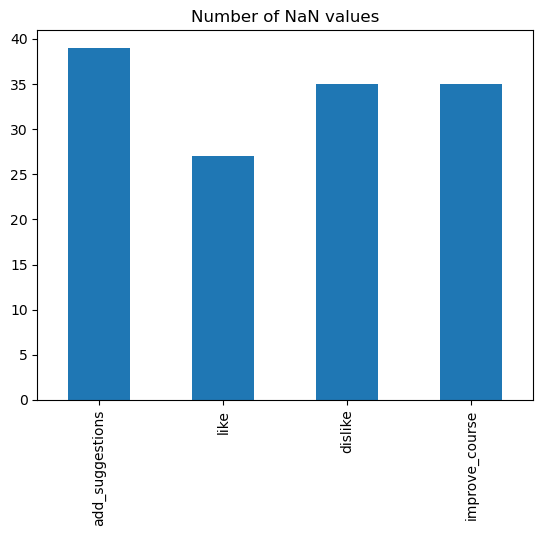

In [6]:
def plot_nan_values(data, title=None):
    print(data.isna().sum())
    data.isna().sum().plot(kind='bar')
    
    if title:
        plt.title(title)
    else:
        plt.title('Number of NaN values')
    plt.show()

plot_nan_values(data)

# Process text

In [7]:
def apply_fn(data, fn, columns, **kwargs):
    """Apply a function to multiple columns.

    Args:
        data (pd.DataFrame): pandas dataframe
        fn (function): python function
        columns (list): list of column names

    Returns:
        pd.DataFrame: pandas data frame after applying the function.
    """
    data_c = data.copy()
    for col in columns:
        data_c[col] = data_c[col].apply(fn, **kwargs)
    return data_c

In [8]:
arabert_prep = ArabertPreprocessor(model_name="aubmindlab/bert-base-arabertv2")

[2024-06-03 01:26:48,437 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [9]:
def process_text(text):
    if text is not np.nan:
        text = str(text)
        text = text.lower()
        clean_text = text.replace("ŸÑÿßŸäŸàÿ¨ÿØ", "ŸÑÿß ŸäŸàÿ¨ÿØ")

        # do some general preprocessing using arabert
        clean_text = arabert_prep.preprocess(clean_text)
        clean_text = arabert_prep.unpreprocess(clean_text)

        # replace line breakers with space
        clean_text = clean_text.replace("\n", " ")
        # ÿ≠ÿ∞ŸÅ ÿßŸÑÿ≤ÿÆÿ±ŸÅÿßÿ™ ÿßŸÑŸÖÿÆÿ™ŸÑŸÅÿ©
        clean_text = strip_diacritics(clean_text)
        # ÿ™Ÿàÿ≠ŸäÿØ ÿßŸÑŸáŸÖÿ≤ÿ©
        # clean_text = normalize_hamza(clean_text, method="tasheel")
        # remove extra inner spaces
        clean_text = re.sub(r"\s+", " ", clean_text)
        # remove trailing white spaces
        clean_text = clean_text.strip()

        return clean_text
    
    else: 
        return np.nan

In [10]:
data = apply_fn(data, process_text, data.columns)

In [11]:
data.head()

add_suggestions             like  dislike improve_course
0         ŸÑÿß ŸäŸàÿ¨ÿØ  ÿßŸÑŸÖŸÇÿ±ÿ± ÿ®ÿ¥ŸÉŸÑ ÿπÿßŸÖ  ŸÑÿß ŸäŸàÿ¨ÿØ        ŸÑÿß ŸäŸàÿ¨ÿØ
1         ŸÑÿß ŸäŸàÿ¨ÿØ  ÿßŸÑŸÖŸÇÿ±ÿ± ÿ®ÿ¥ŸÉŸÑ ÿπÿßŸÖ  ŸÑÿß ŸäŸàÿ¨ÿØ        ŸÑÿß ŸäŸàÿ¨ÿØ
2         ŸÑÿß ŸäŸàÿ¨ÿØ      ÿ∑ÿ±ŸäŸÇÿ© ÿßŸÑÿ¥ÿ±ÿ≠  ŸÑÿß ŸäŸàÿ¨ÿØ        ŸÑÿß ŸäŸàÿ¨ÿØ
3               -                -        -              -
4               -                -        -              -

# Find most frequent values

In [12]:
data['add_suggestions'].value_counts().nlargest(5)

ŸÑÿß ŸäŸàÿ¨ÿØ    1345
.           821
-            97
nothing      91
no           63
Name: add_suggestions, dtype: int64

In [13]:
# calculate most frequent values in each column
topk = 15

most_frequent_values = {
    col_name: data[col_name].value_counts().nlargest(topk) for col_name in data.columns
}

In [14]:
for k, v in most_frequent_values.items():
    print('=='*20)
    print(f'Most frequent values in ({k})')
    print('=='*20)
    print(v)

========================================

Most frequent values in (add_suggestions)

========================================

ŸÑÿß ŸäŸàÿ¨ÿØ         1345
.                821
-                 97
nothing           91
no                63
ŸÑÿß                49
..                36
none              34
ŸÑÿß ÿ¥Ÿäÿ°            24
non               17
ÿßŸÑŸÖÿßÿØÿ© ÿ±ÿßÿ¶ÿπÿ©      13
ŸÑÿßÿ¥Ÿäÿ°             12
ŸÑÿßÿ™Ÿàÿ¨ÿØ            11
ÿ¥ŸÉÿ±ÿß              11
ŸÑÿßÿ¥Ÿä              11
Name: add_suggestions, dtype: int64

========================================

Most frequent values in (like)

========================================

ŸÑÿß ŸäŸàÿ¨ÿØ         922
.               832
-                81
everything       51
..               39
ŸÑÿß               25
no               23
none             22
all              17
ŸÉŸÑ ÿ¥Ÿäÿ°           17
ŸÉŸÑ ÿ¥Ÿä            14
nothing          14
ŸÑÿß ÿ¥Ÿäÿ°           13
ÿßŸÑŸÖÿßÿØÿ© ÿ±ÿßÿ¶ÿπÿ©     13
ŸÉŸÑ ÿ¥ÿ¶            11
Name: like, dtype: int64

========================================

Most frequent values in (dislike)

========================================

ŸÑÿß ŸäŸàÿ¨ÿØ          1383
.                 829
nothing           120
-                  97
..                 39
ŸÑÿß                 36
no                 32
none               29
ŸÑÿß ÿ¥Ÿäÿ°             27
ŸÑÿßÿ¥Ÿäÿ°              20
ŸÑÿß ÿ¥Ÿä              18
non                14
ŸÑÿßÿ¥Ÿä               13
- -                 9
ÿßŸÑŸÖÿØÿ© ÿßŸÑÿ≤ŸÖŸÜŸäÿ©       9
Name: dislike, dtype: int64

========================================

Most frequent values in (improve_course)

========================================

ŸÑÿß ŸäŸàÿ¨ÿØ    1313
.           822
ŸÑÿß          130
no          130
-            98
..           42
nothing      38
none         22
non          17
ŸÑÿß ÿ¥Ÿä        13
ÿ¥ŸÉÿ±ÿß         11
- -          11
ŸÑÿßÿ¥Ÿäÿ°         8
0             7
ŸÑÿßÿ¥Ÿä          7
Name: improve_course, dtype: int64

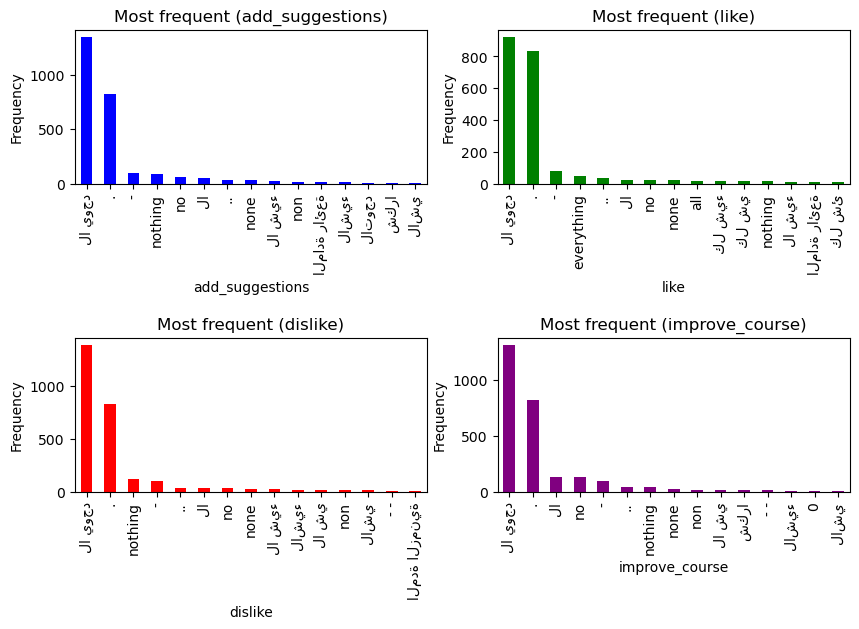

In [15]:
# plot most frequent values
plt.figure(figsize=(10, 6))
plt.subplots_adjust(hspace=1)
color_list = ['blue', 'green', 'red', 'purple']

for i, (col_name, freq_values) in enumerate(most_frequent_values.items()):
    plt.subplot(2, 2, i+1)
    freq_values.plot(kind='bar', color=color_list[i])
    plt.title(f'Most frequent ({col_name})')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    # plt.xticks(rotation=45)


# Remove the most frequent values

In [16]:
for col_name, freq_values in most_frequent_values.items():
    data[col_name] = data[col_name].replace(freq_values.index.to_list(), np.nan)

In [17]:
data.sample(10)

add_suggestions               like dislike       improve_course
2705             NaN                NaN     NaN                  NaN
2635             NaN                NaN     NaN                  NaN
1577             NaN                NaN     NaN                  NaN
2376             NaN                NaN   ŸÑÿß ÿ¥ÿ¶  ÿ≤ŸäÿßÿØÿ© ÿßŸÑÿ¨ÿßŸÜÿ® ÿßŸÑÿπŸÖŸÑŸä
2368         ŸÑÿß ŸäŸàÿ≠ÿØ  ÿßŸÑÿ™ŸÇŸÜŸäÿ© ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖÿ©     NaN                  NaN
893              NaN                NaN     NaN                  NaN
490              NaN                NaN     NaN                  NaN
1040             NaN                NaN     NaN                  NaN
1775             NaN                NaN     NaN                  NaN
118              NaN                NaN     NaN                  NaN

add_suggestions    2674
like               2121
dislike            2710
improve_course     2704
dtype: int64

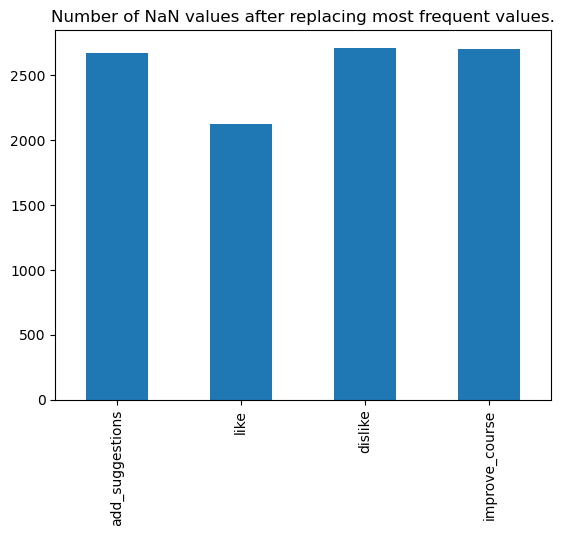

In [18]:
plot_nan_values(data, title='Number of NaN values after replacing most frequent values.')

# Remove short strings

In [19]:
short_words = []

In [20]:
def remove_short_str(row, n_chars=5):
    if len(str(row)) >= n_chars and row is not np.nan:
        return row
    
    short_words.append(row)
    return np.nan

In [21]:
num_characters = 5

data = apply_fn(data, remove_short_str, data.columns, n_chars=num_characters)

In [22]:
print('Number of short words in data:', len(short_words))
print('Number of unique short words:', len(set(short_words)))
print(set(short_words))


Number of short words in data: 10311

Number of unique short words: 26

{
    'good',
    'ŸÜ',
    '‚Ä¶',
    'no.',
    'n',
    'ÿå',
    'ŸÑÿßÿß',
    'nil',
    'ÿåÿå',
    'na',
    'ÿ≠',
    'ÿ´',
    '_',
    '- -',
    'all',
    '0',
    'ŸÑŸÑÿß',
    'ŸÑÿßÿ¥Ÿä',
    'Ÿä',
    nan,
    'ÿ¨ŸÖŸäŸÑ',
    'non',
    'ÿ®',
    'ÿßŸÑŸÉŸÑ',
    '‚Ä¶‚Ä¶.:',
    'ÿ±ÿßÿ¶ÿπ'
}

add_suggestions    2703
like               2159
dislike            2728
improve_course     2721
dtype: int64

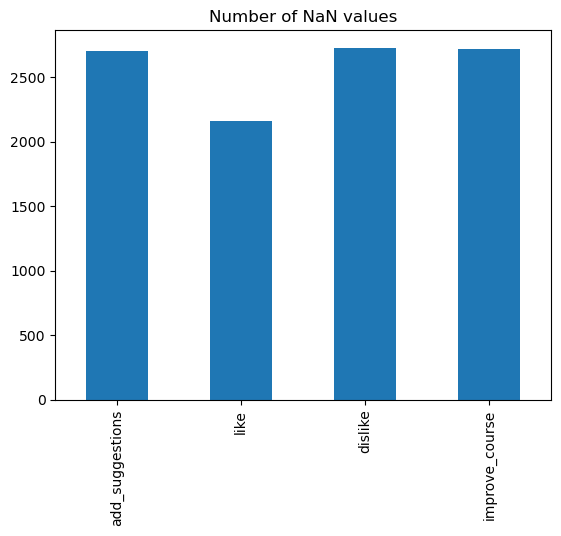

In [23]:
plot_nan_values(data)

In [24]:
type(data)

pandas.core.frame.DataFrame

# Remove duplicates and save processed data

In [25]:
# number of duplications
for col in data.columns:
    print(f'Number of duplicated values in {col}:', data[col].dropna().duplicated().sum())

Number of duplicated values in add_suggestions: 79

Number of duplicated values in like: 141

Number of duplicated values in dislike: 38

Number of duplicated values in improve_course: 46

In [26]:
# np.nan
processed_data = {
    col_name: [value for value in data[col_name].dropna().drop_duplicates()] for col_name in data.columns
}

In [27]:
processed_data['like'][:4]

['ÿßŸÑŸÖŸÇÿ±ÿ± ÿ®ÿ¥ŸÉŸÑ ÿπÿßŸÖ',
 'ÿ∑ÿ±ŸäŸÇÿ© ÿßŸÑÿ¥ÿ±ÿ≠',
 'ÿπÿ∂Ÿà ÿßŸÑÿ™ÿØÿ±Ÿäÿ≥ ŸàŸÖÿ≠ÿ™ŸàŸâ ÿßŸÑŸÖŸÇÿ±ÿ±',
 'ÿ™ÿ∑ŸàŸäÿ± ŸÖŸáÿßÿ±ÿßÿ™ ÿßŸÑŸÇŸäÿßÿØÿ©']

In [28]:
save_path = '../../data/processed/porcessed_data.json'

with open(save_path, 'w') as f:
    json.dump(processed_data, f)

In [29]:
for k, v in processed_data.items():
    print(f'({k}) column has {len(v)} sentences.')

(add_suggestions) column has 297 sentences.

(like) column has 779 sentences.

(dislike) column has 313 sentences.

(improve_course) column has 312 sentences.

# Plot sentence lengths

In [30]:
text = []
for k, v in processed_data.items():
    text.extend((v))

text = sorted(set(text))
print(len(text))

1610

In [31]:
text_length = [len(sentence.split()) for sentence in text]

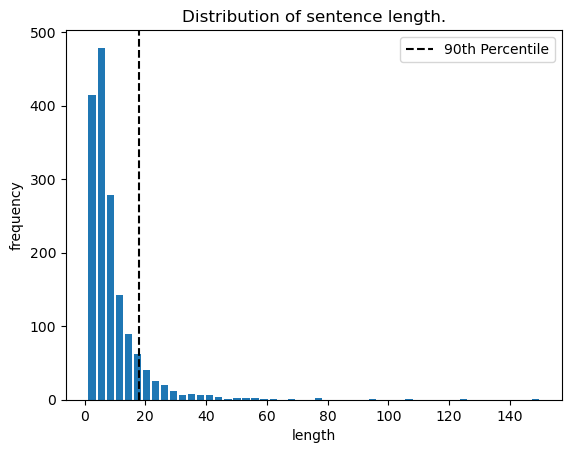

In [32]:
plt.hist(text_length, bins=50, rwidth=0.8)
plt.title('Distribution of sentence length.')
plt.xlabel('length')
plt.ylabel('frequency')

percentile_90 = np.percentile(text_length, 90)
plt.axvline(percentile_90, color='k', linestyle='--', label='90th Percentile')
plt.legend()
plt.show()